# Import Necessary Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

# Connecting SQL

In [23]:
db=mysql.connector.connect(
    host="localhost",
    username="root",
    password="Ayan@1999",
    database="ecommerce_18_08_2024"
)

cur=db.cursor()

# List all unique cities where customers are located.

In [3]:
query="""Select Distinct(customer_city) from ecommerce_18_08_2024.customers"""

cur.execute (query)
data=cur.fetchall()
data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

# Count the number of orders placed in 2017.

In [4]:
query = """
SELECT COUNT(order_id)
FROM ecommerce_18_08_2024.orders
WHERE YEAR(order_purchase_timestamp) = 2017
"""
cur.execute(query)
data = cur.fetchall()
print(data)


[(45101,)]


# Find the total sales per category.

In [5]:
query="""
select upper(product_category),round(sum(payment_value),2)
from ecommerce_18_08_2024.payments
inner join ecommerce_18_08_2024.order_items
on payments.order_id=order_items.order_id
inner join ecommerce_18_08_2024.products
on order_items.product_id=products.product_id
group by product_category
"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["Category","Total Sales"])
df

,Category,Total Sales
0,PERFUMERY,506738.66
1,FURNITURE DECORATION,1430176.39
2,TELEPHONY,486882.05
3,BED TABLE BATH,1712553.67
4,AUTOMOTIVE,852294.33
...,...,...
69,CDS MUSIC DVDS,1199.43
70,LA CUISINE,2913.53
71,FASHION CHILDREN'S CLOTHING,785.67
72,PC GAMER,2174.43


# Calculate the percentage of orders that were paid in installments.

In [6]:
query="""
select (sum(case when payment_installments>1 then 1 else 0 end)*100/count(*))
from payments
"""

cur.execute(query)
data=cur.fetchall()
data[0][0]

Decimal('49.4176')

# Count the number of customers from each state. 

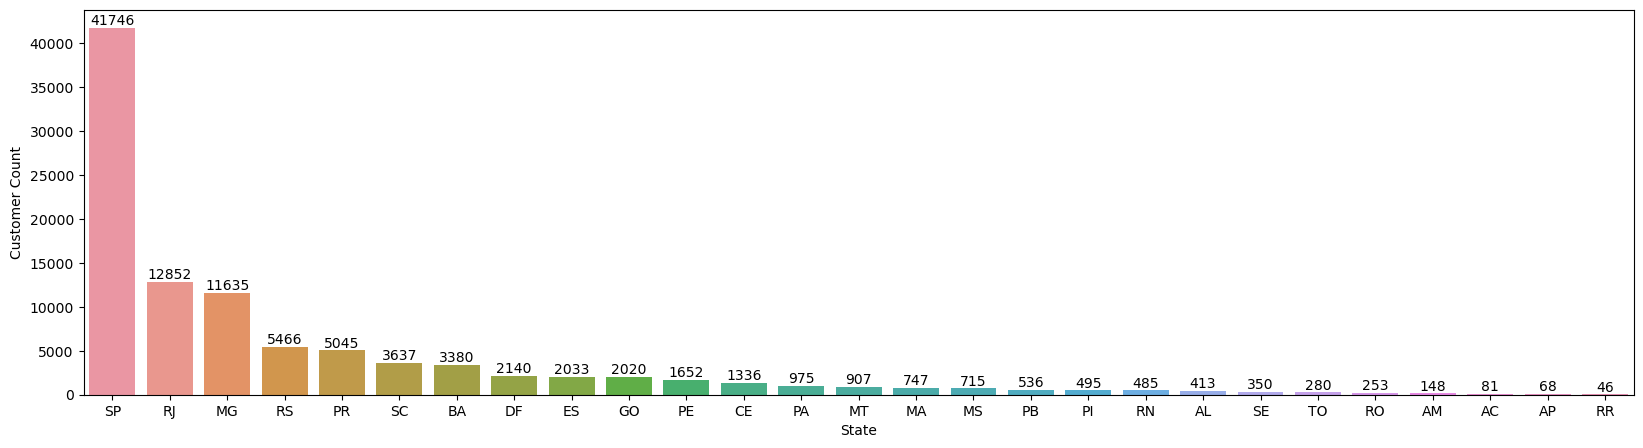

In [7]:
query="""
select customer_state,count(customer_id)
from ecommerce_18_08_2024.customers
group by customer_state
"""

cur.execute(query)
data=cur.fetchall()
data=pd.DataFrame(data,columns=["State","Customer Count"]).sort_values(by="Customer Count",ascending=False).reset_index(drop=True)
plt.figure(figsize=(20,5))
bar=sns.barplot(x="State",y="Customer Count",data=data)

for bars in bar.containers:
    bar.bar_label(bars)

# Calculate the number of orders per month in 2018.

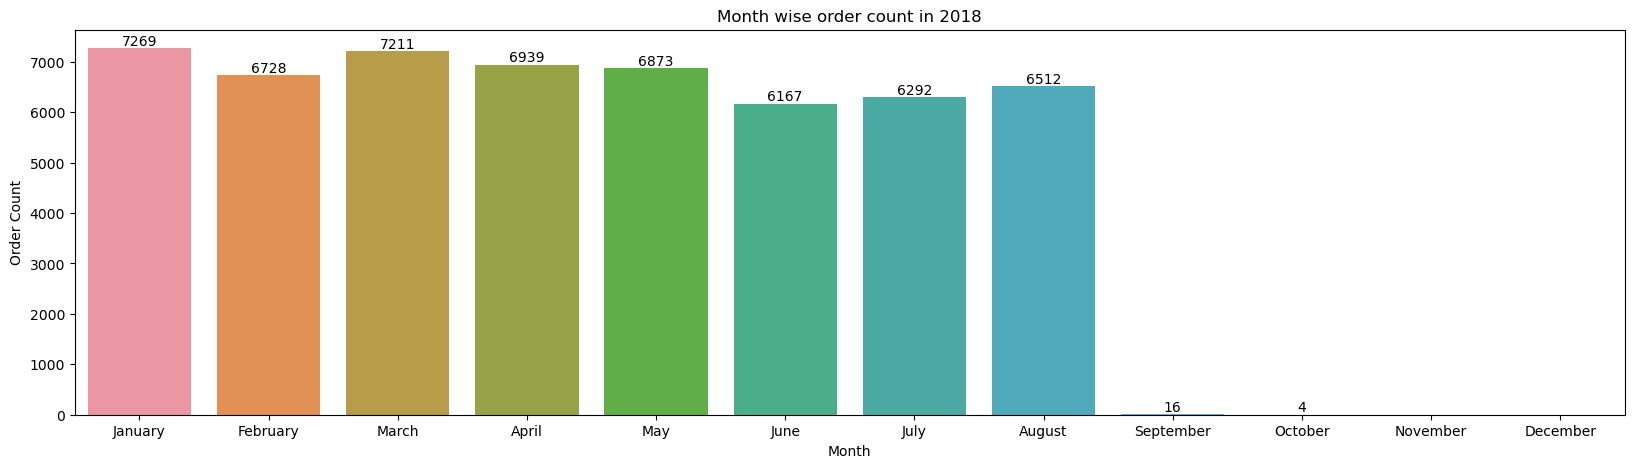

In [8]:
query="""
select monthname(order_purchase_timestamp),count(order_id)
from ecommerce_18_08_2024.orders
where year(order_purchase_timestamp)=2018
group by monthname(order_purchase_timestamp)
"""

cur.execute(query)
data=cur.fetchall()
data=pd.DataFrame(data,columns=["Month","Order Count"])
month_ord=["January","February","March","April","May","June","July","August","September","October","November","December"]
plt.figure(figsize=(20,5))
barplot=sns.barplot(x="Month",y="Order Count",data=data,order=month_ord)
barplot.bar_label(barplot.containers[0])
plt.title("Month wise order count in 2018")
plt.show()

# Find the average number of products per order, grouped by customer city.

In [9]:
query="""
with count_of_product as 
(
select orders.order_id,orders.customer_id,count(order_items.order_id) as oc
from ecommerce_18_08_2024.orders
join ecommerce_18_08_2024.order_items
on orders.order_id=order_items.order_id
group by orders.order_id,orders.customer_id
)
SELECT Upper(customers.customer_city),round(avg(count_of_product.oc),2)
from ecommerce_18_08_2024.customers
join count_of_product
on customers.customer_id=count_of_product.customer_id
group by customers.customer_city
"""

cur.execute(query)
data=cur.fetchall()
data=pd.DataFrame(data,columns=["City","Average Product Count"])
data

,City,Average Product Count
0,SAO PAULO,1.16
1,SAO JOSE DOS CAMPOS,1.14
2,PORTO ALEGRE,1.17
3,INDAIAL,1.12
4,TREZE TILIAS,1.27
...,...,...
4105,BURITI,3.00
4106,MORRO AGUDO DE GOIAS,1.00
4107,SANTA FILOMENA,1.00
4108,GUAMIRANGA,1.00


# Calculate the percentage of total revenue contributed by each product category.

In [10]:
query="""
select upper(products.product_category),round(sum(payments.payment_value)*100/(select sum(payments.payment_value) from payments),2) as revenue
from products join order_items
on order_items.product_id=products.product_id
join payments
on payments.order_id=order_items.order_id
group by products.product_category
order by revenue desc
"""

cur.execute(query)
data=cur.fetchall()
data=pd.DataFrame(data,columns=["Category","Percentage of total revenue"])
data.head(10)

,Category,Percentage of total revenue
0,BED TABLE BATH,10.70
1,HEALTH BEAUTY,10.35
2,COMPUTER ACCESSORIES,9.90
3,FURNITURE DECORATION,8.93
4,WATCHES PRESENT,8.93
5,SPORT LEISURE,8.70
6,HOUSEWARES,6.84
7,AUTOMOTIVE,5.32
8,GARDEN TOOLS,5.24
9,COOL STUFF,4.87


# Identify the correlation between product price and the number of times a product has been purchased.

In [11]:
query = """
select Upper(products.product_category),count(order_items.order_id),round(avg(order_items.price),2)
from products join order_items
on products.product_id=order_items.product_id
group by Upper(products.product_category)
"""
cur.execute(query)
data=cur.fetchall()
data=pd.DataFrame(data,columns=["Ctgy","Ord_Count","Price"])

arr1=data["Ord_Count"]
arr2=data["Price"]
np.corrcoef([arr1,arr2])

array([[ 1.        , -0.10631514],
       [-0.10631514,  1.        ]])

**There is no dependency between product price and the order count.**

## Calculate the total revenue generated by each seller, and rank them by revenue.


In [12]:
query="""
select sellers.seller_id,round(sum(payments.payment_value),2) as revenue
from sellers join order_items
on sellers.seller_id=order_items.seller_id
join payments
on payments.order_id=order_items.order_id
group by sellers.seller_id
order by revenue desc
"""
cur.execute(query)
data=cur.fetchall()
data=pd.DataFrame(data,columns=["Seller Id","Revenue"])
data

,Seller Id,Revenue
0,7c67e1448b00f6e969d365cea6b010ab,507166.91
1,1025f0e2d44d7041d6cf58b6550e0bfa,308222.04
2,4a3ca9315b744ce9f8e9374361493884,301245.27
3,1f50f920176fa81dab994f9023523100,290253.42
4,53243585a1d6dc2643021fd1853d8905,284903.08
...,...,...
3090,ad14615bdd492b01b0d97922e87cb87f,19.21
3091,702835e4b785b67a084280efca355756,18.56
3092,4965a7002cca77301c82d3f91b82e1a9,16.36
3093,77128dec4bec4878c37ab7d6169d6f26,15.22


# Calculate the moving average of order values for each customer over their order history.

In [13]:
query="""
SELECT 
    customer_id,
    order_purchase_timestamp, 
    payment,
    AVG(payment) OVER (
        PARTITION BY customer_id 
        ORDER BY order_purchase_timestamp 
        ROWS BETWEEN 2 PRECEDING AND CURRENT ROW
    ) AS moving_avg
FROM 
    (SELECT 
         orders.customer_id,
         orders.order_purchase_timestamp,
         payments.payment_value as payment 
     FROM 
         orders 
     JOIN 
         payments
     ON 
     
     
         orders.order_id = payments.order_id) AS a;
"""
cur.execute(query)
data=cur.fetchall()
data=pd.DataFrame(data,columns=["Customer ID","Timestamp","Price","Moving Average"])
data

,Customer ID,Timestamp,Price,Moving Average
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.419998
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35,179.350006
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01,107.010002
...,...,...,...,...
103881,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,71.23,27.120001
103882,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,63.13,63.130001
103883,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,214.13,214.130005
103884,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.50,45.500000


## Calculate the cumulative sales per month for each year.

In [14]:
query="""
select year,month ,payment,
sum(payment)over(order by year,month)
from
(select year(order_purchase_timestamp) as year,month(order_purchase_timestamp)as month,round(sum(payment_value),2) as payment
from orders
join payments
on orders.order_id=payments.order_id
group by year,month
order by year,month) as a
"""

cur.execute(query)
data=cur.fetchall()
data=pd.DataFrame(data,columns=["Year","Month","Sale","Cumulative sale"])
data

,Year,Month,Sale,Cumulative sale
0,2016,9,252.24,252.24
1,2016,10,59090.48,59342.72
2,2016,12,19.62,59362.34
3,2017,1,138488.04,197850.38
4,2017,2,291908.01,489758.39
5,2017,3,449863.60,939621.99
6,2017,4,417788.03,1357410.02
7,2017,5,592918.82,1950328.84
8,2017,6,511276.38,2461605.22
9,2017,7,592382.92,3053988.14


## Calculate the year-over-year growth rate of total sales.

In [15]:
query="""
select Year,Payment,
lag(Payment)over(order by Year),
((Payment-lag(Payment)over(order by Year))/lag(Payment)over(order by Year))*100 as growth
from
(select year(order_purchase_timestamp)as Year, round(sum(payment_value),2) as Payment
from orders 
join
payments
on 
orders.order_id=payments.order_id
group by Year) as a
"""

cur.execute(query)
data=cur.fetchall()
data=pd.DataFrame(data,columns=["Year","Sales","Previous Sale","Growth"])
data

,Year,Sales,Previous Sale,Growth
0,2016,59362.34,NaN,NaN
1,2017,7249746.73,59362.34,12112.703761
2,2018,8699763.05,7249746.73,20.000924


# Identify the top 3 customers who spent the most money in each year.

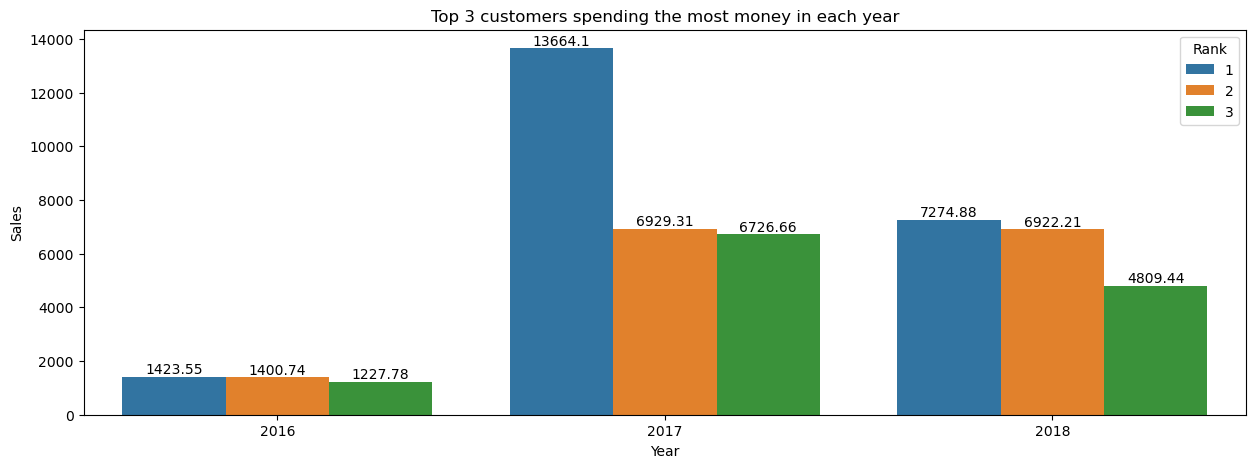

In [62]:
query="""
SELECT 
    order_year,
    cust,
    payment,
    d_rank
from (
    SELECT 
        YEAR(orders.order_purchase_timestamp) AS order_year,
        orders.customer_id AS cust, 
        ROUND(SUM(payments.payment_value), 2) AS payment,
        DENSE_RANK() OVER (PARTITION BY YEAR(orders.order_purchase_timestamp) ORDER BY ROUND(SUM(payments.payment_value), 2) DESC) AS d_rank
    FROM orders
    JOIN payments 
        ON orders.order_id = payments.order_id
    GROUP BY 
        YEAR(orders.order_purchase_timestamp),
        orders.customer_id
) AS inner_query
WHERE d_rank <= 3;

"""
cur.execute(query)
data=cur.fetchall()
data=pd.DataFrame(data,columns=["Year","Customer","Sales","Rank"])
data["Rank"]=data["Rank"].astype(str)
plt.figure(figsize=(15,5))
bar=sns.barplot(data=data,x="Year",y="Sales",hue="Rank")
for bars in bar.containers:
    bar.bar_label(bars)
plt.title("Top 3 customers spending the most money in each year")
plt.show()
